# Training Models

* linear regression Models
    * direct "closed-form" equation
    * Gradient Descent (GD)

* polynomial regression (for nonlinear datasets)
    * overfitting
    * learning curves
    * regularization

* logistic regression

* softmax regression

# Linear Regression

A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the bias term (the intercept term).

* linear regression model prediction : $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_nx_n$
    * $y$ is the predicted value
    * _n_ is the number of features
    * $x_i$ is the i_th feature value
    * $\theta_j$ is the j_th model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, ..., $\theta_n$).

* ...or, in vectorized form : $y = h_\theta(X) = \Theta.X$
    * **_$\Theta$_** is the model's **_parameter vector_**, including the bias term $\theta_0$ and the feature weightes $\theta_1$ to $\theta_n$
    * **_X_** is the instance's **_feature vector_**, including $x_0$ to $x_n$ with $x_0$=1 
    * **_$\Theta$.x_** is the **_dot product_** of the two vectors (NOT the multiplication of the two vectors!), i.e., $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \theta_nx_n$
    * **__$h_\theta$__** is the **_hypothesis function_**, using the model parameters **_$\Theta$_**

To train a linear regression model is to find the value of $\Theta$ (parameter vector) that minimize the **_Root Mean Squared Error (RMSE)_**.

Mean Squared Error (MSE) cost function : MSE(X, **__$h_\theta$__**), or, MSE($\Theta$)

In [3]:
# set up code

# check if python >= 3.5 
import sys
assert sys.version_info >= (3, 5)

# check if scikit-learn is >= 0.20
import sklearn
assert sklearn.__version__ >= '0.20'

# common imports
import numpy as np
import os

# set a fixed random seed
np.random.seed(42)

# plot pretty figures
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save figure
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'training_linear_models'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

# normal equation

In [4]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


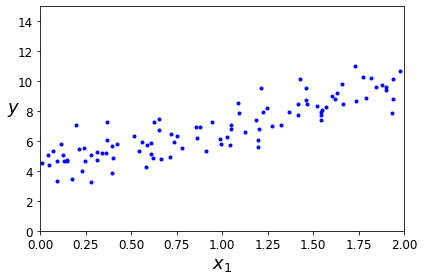

In [5]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')
plt.show()

## manually calculate theta_best using normal equation and make a prediction

In [6]:
# add x0=1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [22]:
# make prediction using theta_best
X_new = np.array([[0], [2]])
# add x0=1 to each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.21509616],
       [9.75532293]])

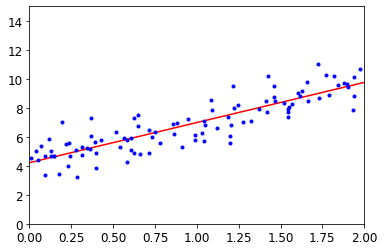

In [23]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


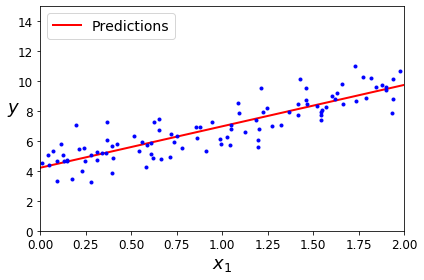

In [9]:

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## perform the same linear regression using scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

intercept   = lin_reg.intercept_
coefficient = lin_reg.coef_
prediction  = lin_reg.predict(X_new)

print('the intercept is',   '\t:', intercept)
print('the coefficient is', '\t:', coefficient)
print('the prediction is:', '\n')
print(prediction)


the intercept is 	: [4.21509616]
the coefficient is 	: [[2.77011339]]
the prediction is: 

[[4.21509616]
 [9.75532293]]


## call scipy.linalg.lstsq() function

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## computational complexity

# Gradient Descent

* the general idea: tweak parameters iteratively to minimize a cost function

* It measures the local gradient of the error function with regard to the parameter vector $\Theta$, and it goes in the direction of descending gradient until it reaches zero. 

* It ususally starts by filling $\Theta$ with random values (randomzied initialization). It will be improved gradually, with each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum. 

* The learning step size, or the **_learning rate_** hyperparameter, is proportional to the slope of the cost function, so the steps gradually get smaller.

* cost fuctions may have irregular shapes as compared to a bowl shape, i.e., it may have local minimum and plateau. 

* Small learing rate will take many iterations to converge, whereas large learning rate may risk jumpping over the converge point. 

* the MSE cost function for linear regression model is a **_convex function_** which guarantees a global minimum. 

* scales of the features in trainning data set may affect gradient descent. So, similar scales of the features obtained through Scikit-Learn's **_StandardScaler_** class are preferred.  

* training a model means searching through the **_parameter space_** to minimize a cost function. 

## Batch Gradient Descent

* can use **_grid search_** to find a good learning rate (ref Chp2)
* set a very large num of iteration, but stop the algorithm when gradient vector becomes tiny, i.e., < **_tolerance_** value. 

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # initiate random parameters

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for interation in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descend_plot


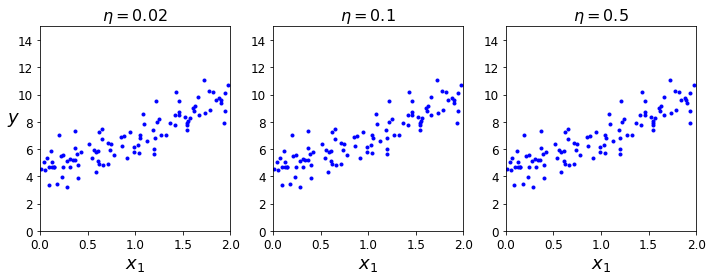

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig('gradient_descend_plot')
plt.show()

# stochastic gradient descent

In [20]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

5074642]]
epoch 45
theta: 
 [[4.19730874]
 [2.75076948]]
epoch 45
theta: 
 [[4.19417441]
 [2.74702144]]
epoch 45
theta: 
 [[4.19604877]
 [2.74770897]]
epoch 45
theta: 
 [[4.19454697]
 [2.74579401]]
epoch 45
theta: 
 [[4.19230269]
 [2.74232774]]
epoch 45
theta: 
 [[4.19317902]
 [2.74373371]]
epoch 45
theta: 
 [[4.1923969 ]
 [2.74252123]]
epoch 45
theta: 
 [[4.19245022]
 [2.74255371]]
epoch 45
theta: 
 [[4.19080828]
 [2.74037807]]
epoch 45
theta: 
 [[4.19045836]
 [2.74029266]]
epoch 45
theta: 
 [[4.18974835]
 [2.74007111]]
epoch 45
theta: 
 [[4.19276716]
 [2.7433477 ]]
epoch 45
theta: 
 [[4.19205041]
 [2.74312405]]
epoch 45
theta: 
 [[4.19430835]
 [2.74686653]]
epoch 45
theta: 
 [[4.19488614]
 [2.74771241]]
epoch 45
theta: 
 [[4.19429109]
 [2.74668156]]
epoch 45
theta: 
 [[4.19382322]
 [2.74594685]]
epoch 45
theta: 
 [[4.19493805]
 [2.74776504]]
epoch 45
theta: 
 [[4.19571749]
 [2.74843153]]
epoch 45
theta: 
 [[4.19719413]
 [2.74875016]]
epoch 45
theta: 
 [[4.19800049]
 [2.75026531]]
epo

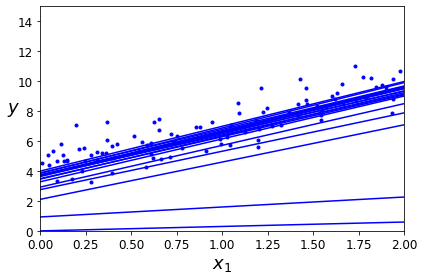

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        print('epoch', epoch)
        print('theta:', '\n', theta)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig('sgd_plot')
plt.show()

In [34]:
print('theta is:')
print(theta)

theta is:
[[4.2340117 ]
 [2.79566752]]


## implementing SGD via scikit-learn

In [36]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [38]:
print('sgd reg intercept:', '\t', sgd_reg.intercept_)
print('sgd reg coefficient:', '\t', sgd_reg.coef_)


sgd reg intercept: 	 [4.18607727]
sgd reg coefficient: 	 [2.7348145]


## mini-batch gradient descent

In [39]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled   = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i : i+minibatch_size]
        yi = y_shuffled[i : i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [40]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [41]:
theta_path_bgd_array = np.array(theta_path_bgd)
theta_path_sgd_array = np.array(theta_path_sgd)
theta_path_mgd_array = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


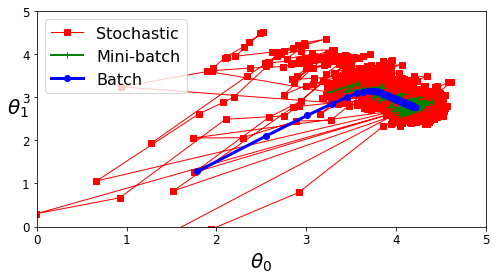

In [47]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd_array[:, 0], theta_path_sgd_array[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd_array[:, 0], theta_path_mgd_array[:, 1], 'g-+', linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd_array[:, 0], theta_path_bgd_array[:, 1], 'b-o', linewidth=3, label='Batch')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20, rotation=0)
plt.axis([0, 5, 0, 5])
save_fig('gradient_descent_paths_plot')
plt.show()

## polynomial regression

In [50]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [51]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


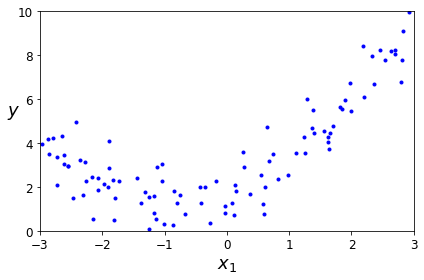

In [52]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_data_plot')
plt.show()

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [54]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ 

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


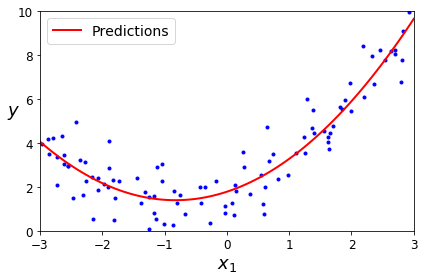

In [57]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_predictions_plot')
plt.show()

Saving figure high_degree_polynomials_plot


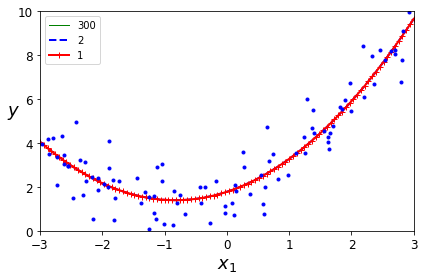

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
                                        ('poly_features', poly_features), 
                                        ('std_scaler', std_scaler), 
                                        ('lin_reg', lin_reg),
                                     ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
save_fig('high_degree_polynomials_plot')
plt.show()